# Matlab for Signals and systems - Exam 08/2022

In the file `Signal.npz`, we provide the vector `y` and the vector `t` which correspond to the signal to analyze. This signal consists of several components:

- A continuous component of amplitude 75
- A fundamental wave at 20Hz
- Harmonics of rank 2, 3 and 20. 

You are asked to: 

## Question 1

Visualize the sampled signal as a function of time (as a sample). Then determine the frequency (Fs) and the sampling period (Ts).

In [71]:
import numpy as np

content = np.load('Signal.npz')
content

NpzFile 'Signal.npz' with keys: t, y, yf1

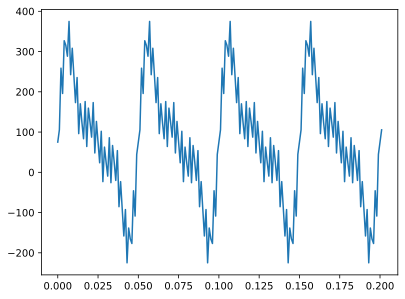

In [72]:
t = content['t']
y = content['y']
yf1 = content['yf1']

from matplotlib import pyplot as plt

# better plots in jupyter
%config InlineBackend.figure_formats = ['svg']

plt.plot(t, y)
plt.show()

In [73]:
from scipy.stats import mode

Ts = mode(np.diff(t)).mode
print(Ts)

Fs = round(1/Ts)
print(Fs)

0.0010000000000000009
1000


## Question 2

Apply the FFT on the time signal and display its frequency content (`Amp` and `f`).

202


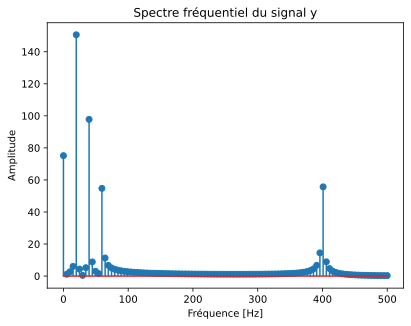

In [74]:
N = len(y)
print(N)

Amp = np.abs(np.fft.fft(y)) / N
Amp = Amp[0:N//2+1]*2
Amp[0] = Amp[0] / 2
 
dF = Fs / N
n = np.arange(N // 2 + 1)
f = dF * n
 
plt.stem(f,Amp)
plt.title('Spectre fréquentiel du signal y')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.show()

Explain and justify the necessity of the different operations applied to represent this frequency content. Do not hesitate to use schematic if necessary.

Expected result:

![](./3_3_1.svg)

Explain the problem(s) encountered on the frequency spectrum. Which phenomenon(s) are involved? Justify with diagrams and explanations.

## Question 3

Correct the problem(s) encountered and display the frequency content obtained.

50


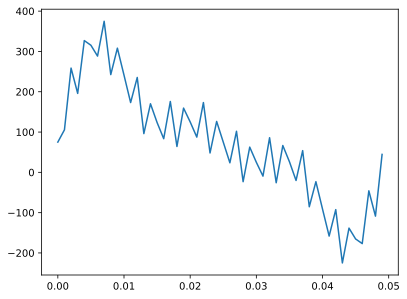

In [75]:
Tf = 1 / 20         # 20 Hz pour l'onde fondamentale
N1 = round(Tf / Ts)
print(N1)

t1 = t[:N1]
y1 = y[:N1]

plt.plot(t1, y1)
plt.show()

50


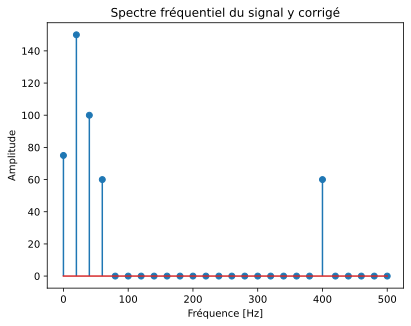

In [76]:
N = len(y1)
print(N)

Amp1 = np.abs(np.fft.fft(y1)) / N
Amp1 = Amp1[0:N//2+1]*2
Amp1[0] = Amp1[0] / 2
 
dF = Fs / N
n = np.arange(N // 2 + 1)
f = dF * n
 
plt.stem(f,Amp1)
plt.title('Spectre fréquentiel du signal y corrigé')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.show()

Expected result:

![](./3_3_3.svg)

## Question 4

Create a transfer function of the system `H`.

The transfer function is the following: $H(s) = \frac{1}{\frac{s^2}{\omega_c^2} + \frac{2s\xi}{\omega_c} + 1}$ with $\omega_c = 574$ rad/s and $\xi = 0.65$

Find the response time at 99% of the system.

In [77]:
import control as ct

s = ct.tf('s')
wc=574
Ksi=0.65

H = 1 / (s**2/wc**2 + 2*s*Ksi/wc + 1)
H.name = "System H"

print(H)

<TransferFunction>: System H
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

              1.891e+08
  ---------------------------------
  574 s^2 + 4.283e+05 s + 1.891e+08


In [78]:
T=max(-1/np.real(ct.poles(H)))
T

np.float64(0.002680246582685608)

In [79]:
T_ss=5*T
T_ss

np.float64(0.01340123291342804)

## Question 5

Apply, at the input of the system, the original signal `y`. Then apply the FFT on the output signal of the system obtained (`yf1`) in **steady state**. 
If you are unable to recover the `yf1` signal (in steady state) by yourself, you can use the one available in the `.npz` file.

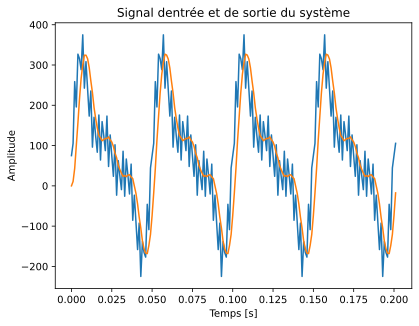

In [80]:
_, yf = ct.forced_response(H, t, y)

plt.plot(t, y)
plt.plot(t, yf)
plt.title('Signal d''entrée et de sortie du système')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.show()

In [81]:
index = np.min(np.where(t>T_ss))
index

np.int64(14)

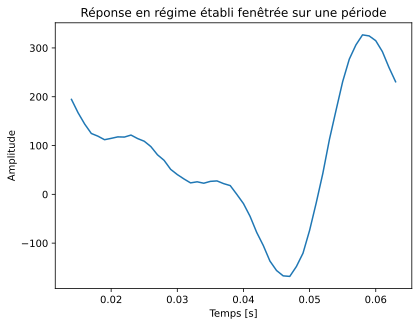

In [82]:
yf1 = yf[index:index+N]
tf1 = t[index:index+N]
 
yf = yf[index:]
tf = t[index:]
 
plt.plot(tf1, yf1)
plt.title('Réponse en régime établi fenêtrée sur une période')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')

plt.show()

In [83]:
Tf = 1 / 20         # 20 Hz pour l'onde fondamentale
N1 = round(Tf / Ts)
N1

50

In [84]:
N=len(yf1)
N

50

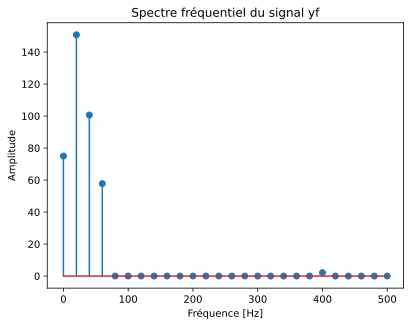

In [85]:
Amp2 = np.abs(np.fft.fft(yf1)) / N
Amp2 = Amp2[:N // 2 + 1] * 2
Amp2[0] = Amp2[0] / 2
 
dF = Fs / N
n = np.arange(N//2 + 1)
f = dF * n
 
plt.stem(f,Amp2)
plt.title('Spectre fréquentiel du signal yf')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.show()

Then compare (by superimposing them on the same graph) the frequency spectrum of the input signal (`Amp`) with the frequency spectrum of the output signal (`Amp2`). Visualize the whole for a frequency going from 0 to 500 Hz.

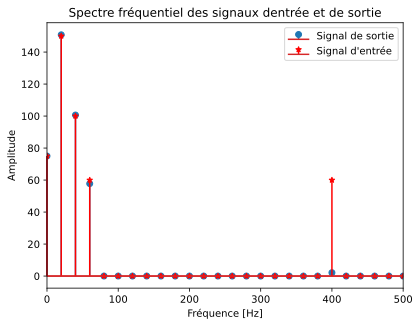

In [86]:
plt.stem(f,Amp2, label='Signal de sortie')
plt.title('Spectre fréquentiel des signaux d''entrée et de sortie')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Amplitude')
plt.stem(f,Amp1,'r', markerfmt='*', label='Signal d\'entrée')
plt.legend()
plt.xlim([0, 500])
plt.show()


Expected result:

![](./3_3_5.svg)



## Question 6

Compare the temporal signal at the output of the filter in steady state (`yf1`) with the one reconstructed from the frequency analysis (to be stored in `y_r`).

NB: The original time signal was constructed with sines.

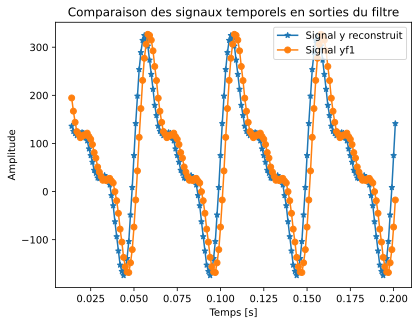

In [ ]:
y_r = Amp2[0]+Amp2[1]*np.sin(2*np.pi*f[1]*tf)+Amp2[2]*np.sin(2*np.pi*f[2]*tf)+Amp2[3]*np.sin(2*np.pi*f[3]*tf)+Amp2[20]*np.sin(2*np.pi*f[20]*tf)


plt.plot(tf, y_r, '-*', label='Signal y reconstruit')
plt.plot(tf, yf, '-o', label='Signal yf1')
plt.title('Comparaison des signaux temporels en sorties du filtre')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Expected result :

![](./3_3_6.svg)

Justify the shift observed between the yf1 signal and the one reconstructed via frequency analysis.